In [66]:
import wisps
import numpy as np
import pandas as pd
import splat
import matplotlib.pyplot as plt
import wisps.simulations as wispsim

In [3]:
specs=pd.read_pickle(wisps.OUTPUT_FILES+'/l_t_dwarfs.pkl')

In [67]:
def classify(s):
    s.normalize(waverange=[1.1,1.65])
    print (splat.classifyGravity(s.splat_spectrum,plot=False, yrange=[0.0, 1.4]), s.spectral_type)

In [68]:
p=specs.apply(classify)

VL-G L1.0
FLD-G L1.0
VL-G M8.0
FLD-G L1.0
VL-G L1.0
VL-G L4.0
Spectral type could not be determined from indices
 T3.0
Spectral type could not be determined from indices
 T9.0
VL-G T0.0
INT-G L0.0
Spectral type could not be determined from indices
 T4.0
INT-G L1.0
Spectral type could not be determined from indices
 T7.0
VL-G L8.0
Spectral type could not be determined from indices
 T1.0
Spectral type could not be determined from indices
 T4.0
FLD-G L1.0
FLD-G L4.0
Spectral type could not be determined from indices
 T4.0
FLD-G L1.0
Spectral type could not be determined from indices
 T6.0


In [60]:
df=wisps.datasets['candidates']
df=df[df.spt.apply(splat.typeToNum)>19.0]

In [69]:
rels=wispsim.POLYNOMIAL_RELATIONS

In [98]:
import splat.empirical as spe
def absolute_mag_dupuy(spt, filt):
    #use the uncertainty in dupuy relation 
    val, unc=spe.typeToMag(spt,filt,set='dupuy')
    return np.random.normal(val, unc)

In [85]:
pol=np.poly1d(np.flip([11.8526, 1.51647, -0.0165129, 0.00105023]))

In [88]:
m_h=np.linspace(-1, 10, 100)

In [90]:
pols=pol(m_h)

In [94]:
inv_pol=np.poly1d(np.polyfit(pols, m_h, 3))

In [100]:
hs=np.array([absolute_mag_dupuy(x, '2MASS H') for x in np.arange(20, 40)])

In [101]:
h_w2=inv_pol(hs)

Text(0, 0.5, '$M_H$')

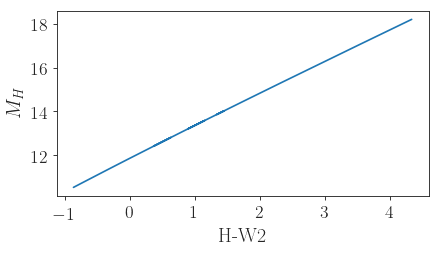

In [104]:
plt.plot(h_w2, hs)
plt.xlabel('H-W2')
plt.ylabel(r'$M_H$')

In [ ]:
w2s= hs-h_w2

${\displaystyle M=m-5\log _{10}(d_{\text{pc}})+5,}$

In [111]:
import numba
@numba.vectorize("float64(float64, float64)")
def app_mag(M, d):
    return M+5*np.log10(d)-5

In [133]:
mags=np.random.uniform(w2s[0],w2s[-1], 1000)
dists=np.random.uniform(10.0, 1500.0, 1000)
app= app_mag(mags, dists)
#app_mag(w2s[-1], 1500)

Text(0, 0.5, 'W2')

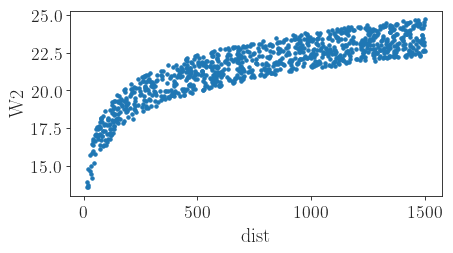

In [134]:
plt.plot(dists, app, '.')
plt.xlabel('dist')
plt.ylabel('W2')